In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
a = np.array([[1, 2, 0], [1, 1, 1]])
a.any()

True

In [19]:
b = np.zeros((3, 4))
b.any()

False

In [78]:
c = np.zeros((3,))
c += 1
c

array([1., 1., 1.])

In [79]:
c = c / (np.sqrt(np.vdot(c, c)))
c

array([0.57735027, 0.57735027, 0.57735027])

In [80]:
np.sqrt(c[0]**2 + c[1]**2 + c[2]**2)

1.0

In [88]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
(a*b)

array([ 4, 10, 18])

In [90]:
a = np.zeros((3, 3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [93]:
a[1] = [2, 3, 4]
a

array([[0., 0., 0.],
       [2., 3., 4.],
       [0., 0., 0.]])

In [133]:
a = np.array([[[1.0, 0.0, 0.0, 1.0], [1.0, 1.0, 0.0, 1.0]],[[.0, 1.0, 0.0, 1.0], [1.0, 1.0, 1.0, 1.0]]], dtype=np.float32)
a
#plt.imshow(a)
#plt.plot()

array([[[1., 0., 0., 1.],
        [1., 1., 0., 1.]],

       [[0., 1., 0., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

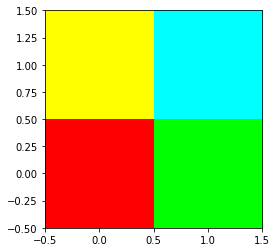

In [172]:
a = np.array([[[1.0, 0.0, 0.0, 1.0], [1.0, 1.0, 0.0, 1.0]],[[.0, 1.0, 0.0, 1.0], [.0, 1.0, 1.0, 1.0]]], dtype=np.float32)
a = np.transpose(a, axes = (1, 0, 2))
plt.imshow(a, origin = 'lower')
plt.show()

In [101]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([2, 3])
a*b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [5]:
a = np.array([1, 2, 3])
b = np.array(a)
b[0] = 4
print(a, b)

[1 2 3] [4 2 3]


In [20]:
vec = np.array([1, 2, 3])
mat = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
(vec * mat.T).T

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [23]:
np.array([line @ vec for line in mat])

array([14, 32, 50])

In [24]:
b @ a

array([14, 32, 50])

In [5]:
points = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [0.7, 0.3],
    [0.5, 1.5],
    [0.4, 1.2]
])
scipy.spatial.ConvexHull(points)

NameError: name 'scipy' is not defined

In [6]:
mat = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
base = np.array([[1, 0, 0],
               [0, 1, 0]])
np.array([mat @ base[0], mat @ base[1]]).T

array([[1, 2],
       [4, 5],
       [7, 8]])

In [10]:
mat2 = np.array([[2, 3],
             [3, -1],
             [1, 5],
             [7, 0]])
mat2[:,0].argmin()

2

In [12]:
mat2 - np.array([1, 2])

array([[ 1,  1],
       [ 2, -3],
       [ 0,  3],
       [ 6, -2]])

In [18]:
print(np.sort(mat2, axis = 1), mat2, sep='\n')

[[ 2  3]
 [-1  3]
 [ 1  5]
 [ 0  7]]
[[ 2  3]
 [ 3 -1]
 [ 1  5]
 [ 7  0]]


In [22]:
np.array(sorted(mat2, key=lambda x:x[0], reverse=True))

array([[ 7,  0],
       [ 3, -1],
       [ 2,  3],
       [ 1,  5]])

In [26]:
l = list(mat2)
del(l[2])
l

[array([2, 3]), array([ 3, -1]), array([7, 0])]

In [33]:
min(np.array([1, 3, 4, -5]), key=lambda x: -x if x != 4 else float('inf'))

3

In [ ]:
min(mat2, key=lambda x: -x if x != 4 else float('inf'))

In [83]:
def find_convex_hull(points):
    """Retourne l'enveloppe convexe 2D d'une ensemble de points sous la forme d'un np array.
    Ces points sont listés dans un ordre trigonométrique.
    Implémente l'algorithme naif de papier cadeau."""
    #De toute façon, on a toujours 8 points donc assez rapide.
    #Réécrire sans numpy ?
    
    if len(points) <= 1:
        return points
    
    #1. Trouver le point le plus à gauche.
    points_dict = {idx : point for idx, point in enumerate(points)}
    first_idx, first_hull_point = min(points_dict.items(), key = lambda x : x[1][0])
    #2 Emballer le nuage de points
    del points_dict[first_idx]
    idx, hull_point = min(points_dict.items(), key = lambda x : np.array([0, 1]) @ (x[1] - first_hull_point))
    points_dict[first_idx] = first_hull_point
    convex_hull = [first_hull_point]
    while idx != first_idx:
        convex_hull.append(hull_point)
        del points_dict[idx]
        idx, hull_point= min(points_dict.items(), key = lambda x :  (convex_hull[-2] - convex_hull[-1]) @ (x[1] - hull_point))
        points_dict[idx] = hull_point

    return np.array(convex_hull)

In [122]:
points = np.array([
    [0, 0],
    [1, 0.5],
    [0, 0.5],
    [1, 0],
    [0.5, 1],
    [0.2, 0.3],
    [0.7, 0.1],
    [0.2, 0.6]
])*2 + 1
convex_hull = find_convex_hull(points)
convex_hull

array([[1., 1.],
       [3., 1.],
       [3., 2.],
       [2., 3.],
       [1., 2.]])

In [123]:
hull_edges = convex_hull[[(i+1) % len(convex_hull) for i in range(len(convex_hull))], :] - convex_hull
hull_edges

array([[ 2.,  0.],
       [ 0.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 0., -1.]])

In [129]:
pixels = np.array([[[i, j] for j in range(5)] for i in range(5)])

In [134]:
normal_to_hull_edges = np.column_stack((-hull_edges[:, 1], hull_edges[:, 0]))
print(normal_to_hull_edges, hull_edges, sep='\n')

[[-0.  2.]
 [-1.  0.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  0.]]
[[ 2.  0.]
 [ 0.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 0. -1.]]


In [135]:
np.array([1, 1]) @ normal_to_hull_edges[1]

-1.0

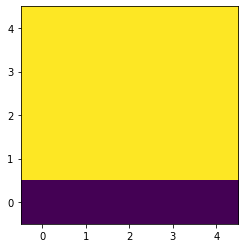

In [153]:
i = 0
test = (pixels - convex_hull[i]) @ normal_to_hull_edges[i]
test[test >= 0] = 1
test[test < 0] = 0
plt.imshow(test.T.clip(0, 1), origin='lower')
plt.show()

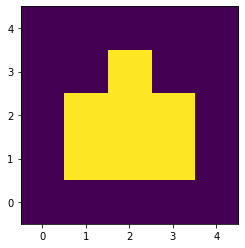

In [165]:
in_hull = np.full(pixels.shape[:-1], True)
for i in range(len(convex_hull)):
    test = (pixels - convex_hull[i]) @ normal_to_hull_edges[i]
    in_hull[test < 0] = False
    
plt.imshow(in_hull.T, origin='lower')
plt.show()

In [164]:
np.full((2, 3), True).dtype

dtype('bool')

In [133]:
pixels - convex_hull[i]

array([[[-1., -1.],
        [-1.,  0.],
        [-1.,  1.],
        [-1.,  2.],
        [-1.,  3.]],

       [[ 0., -1.],
        [ 0.,  0.],
        [ 0.,  1.],
        [ 0.,  2.],
        [ 0.,  3.]],

       [[ 1., -1.],
        [ 1.,  0.],
        [ 1.,  1.],
        [ 1.,  2.],
        [ 1.,  3.]],

       [[ 2., -1.],
        [ 2.,  0.],
        [ 2.,  1.],
        [ 2.,  2.],
        [ 2.,  3.]],

       [[ 3., -1.],
        [ 3.,  0.],
        [ 3.,  1.],
        [ 3.,  2.],
        [ 3.,  3.]]])

In [8]:
def test():
    s = set(i for i in range(4))
    print(s)
    while len(s) != 0:
        print(s.pop())
test()

{0, 1, 2, 3}
0
1
2
3


In [23]:
import random as rd
l = [1, 2, 3]
rd.shuffle(l)
print(l)

[1, 2, 3]


In [25]:
a = np.array([1, 0, 0])
b = np.array([0, 1, 0])
np.cross(a, b)

array([0, 0, 1])

In [26]:
a @ b

0

In [33]:
basis = np.array([[1, 1, 0], [0, 1, 0]])
v = np.array([1, 5, 0])
basis @ v.T

array([6, 5])

In [35]:
a = np.array([3, 4])
b = np.array([5, 6])
a < b

array([ True,  True])

In [36]:
[(i, j) for i in range(2) for j in range(3)]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

In [38]:
bb_center = np.array([0, 0, 0])
data_resolution = np.array([10, 10, 10])
bb_size = np.array([1, 1, 1])
voxel_size = bb_size / data_resolution
bb_tangents = np.eye(3)

'''
   1-----3       ^  z      
  /|    /|       |         
 / |   / |       |--->  y  
5--+--7  |      /          
|  |  |  |     v  x       
|  |  |  |
|  |  |  |     Ordre des coins de bb_corners
|  0--+--2
| /   | /
|/    |/
4-----6
'''
bb_corners = np.array([bb_center -
    (-1)**x * bb_tangents[0] * bb_size[0] / 2 -
    (-1)**y * bb_tangents[1] * bb_size[1] / 2 -
    (-1)**z * bb_tangents[2] * bb_size[2] / 2
    for x in range(2) for y in range(2) for z in range(2)])

In [39]:
bb_corners

array([[-0.5, -0.5, -0.5],
       [-0.5, -0.5,  0.5],
       [-0.5,  0.5, -0.5],
       [-0.5,  0.5,  0.5],
       [ 0.5, -0.5, -0.5],
       [ 0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5]])

In [49]:
l = [np.array([1])]*2
l

[array([1]), array([1])]

In [44]:
l[0][0] = 2

In [54]:
l

[array([1]), array([1])]

In [47]:
l1 = [0, 1, 2]
l2 = [3, 4, 5]
for i, j in zip(l1, l2):
    print (i,j)

0 3
1 4
2 5


In [57]:
np.linalg.norm(np.array([[0, 1, 0], [3, 4, 5]]), axis = 1)

array([1.        , 7.07106781])

In [28]:
#Toutes ces fonctions sont définies dans le cube [0, 1]**3
def add_sphere(center, radius, value, data, coord):
    mask = (np.linalg.norm(coord - center, axis = 3) <= radius)
    data[mask] = value

In [29]:
nb_cubes = 100
data = np.zeros((nb_cubes, nb_cubes, nb_cubes), dtype=np.uint8)
coord = np.array([[[[(i+0.5)/nb_cubes, (j+0.5)/nb_cubes, (k+0.5)/nb_cubes] for i in range(nb_cubes)] for j in range(nb_cubes)] for k in range(nb_cubes)])

In [30]:
add_sphere(np.array([0.5, 0.5, 0.5]), 0.5, 127, data, coord)
add_sphere(np.array([0.5, 0.5, 0.5]), 0.2, 255, data, coord)
add_sphere(np.array([0.75, 0.3, 0.75]), 0.1, 255, data, coord)
add_sphere(np.array([0.4, 0.7, 0.4]), 0.2, 255, data, coord)

IntSlider(value=0, max=99, step=10)

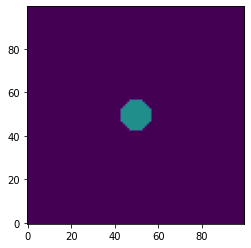

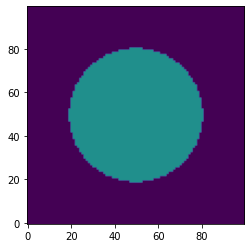

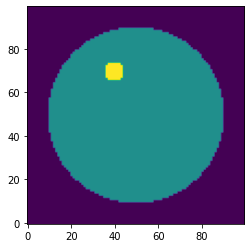

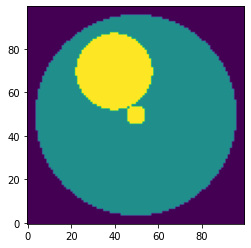

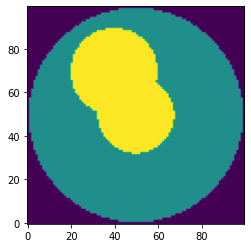

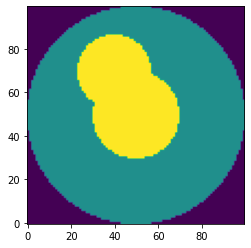

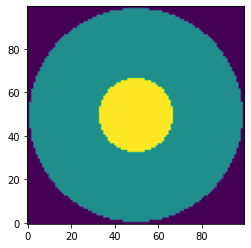

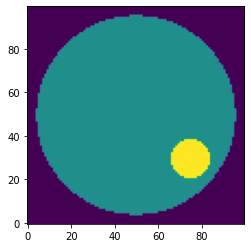

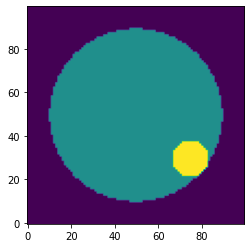

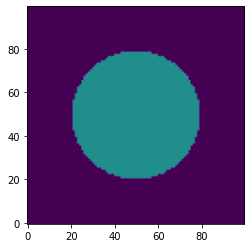

In [36]:
import ipywidgets as widgets


def test(i):
    fig, ax = plt.subplots()
    ax.imshow(data[:, :, i].T, origin='lower', vmin=0, vmax=255)
    plt.show()

int_range = widgets.IntSlider(min=0, max=99, step=10)

display(int_range)

int_range.observe(lambda change : test(change['new']), names='value')
test(0)

In [9]:
l1 = [1, 2, 3]
l2 = [(4, 5), (6, 7), (8, 9)]
for i, j in zip(l1, l2):
    print(i, *j)

1 4 5
2 6 7
3 8 9
